In [21]:
import torch
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [2]:
# y = ax + b
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
# Create train/test split
train_split = int(0.8 * len(X))  # 80% of data used for training set, 20% for testing

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [18]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None,
):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=10, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=10, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

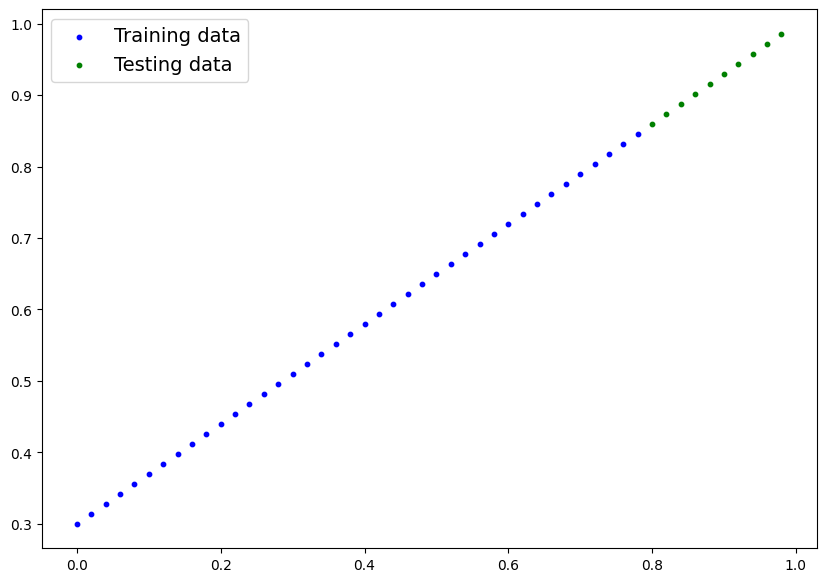

In [19]:
plot_predictions()

In [22]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                1,  # start with random weights (this will get adjusted as the model learns)
                dtype=torch.float,
            ),
            # PyTorch loves float32 by default
            requires_grad=True,
        )

        self.bias = nn.Parameter(
            torch.randn(
                1,  # start with random bias (this will get adjusted as the model learns)
                dtype=torch.float,
            ),  # PyTorch loves float32 by default
            requires_grad=True,
        )

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias
        # this is the linear regression formula (y = a*x + b)

In [29]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create an instance of the model
model = LinearRegressionModel()
model.to(device)
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(),  # parameters of target model to optimize
    lr=0.01,  # learning rate (how much the optimizer should change parameters at each step,
)

In [36]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 1000 

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.28983935713768005 | Test loss: 0.45412322878837585
Epoch: 100 | Train loss: 0.02376994863152504 | Test loss: 0.05494590476155281
Epoch: 200 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 300 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 400 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 500 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 600 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 700 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 800 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882
Epoch: 900 | Train loss: 0.008932482451200485 | Test loss: 0.005023092031478882


In [38]:
# Turn model into evaluation mode
model.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]], device='cuda:0')

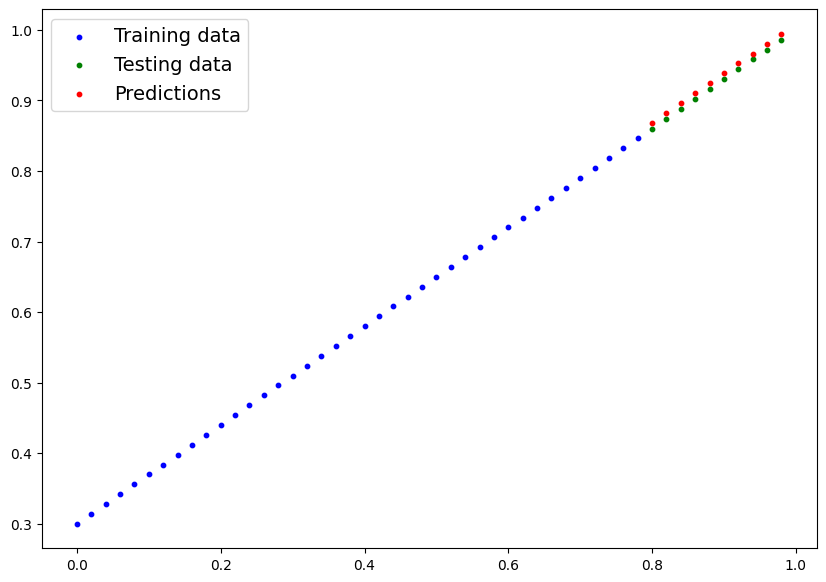

In [39]:
plot_predictions(predictions=y_preds.cpu())